# Обработка изображений

In [1]:
import os
path_img = '/content/clouds'

In [3]:
#распаковка
!unzip '/content/clouds.zip'

Archive:  /content/clouds.zip
   creating: clouds/
  inflating: clouds/image_image_00001_20210420_const_0010_0.jpg  
  inflating: clouds/image_image_00001_20210420_const_0011_1.jpg  
  inflating: clouds/image_image_00001_20210420_const_0012_2.jpg  
  inflating: clouds/image_image_00001_20210420_const_0019_3.jpg  
  inflating: clouds/image_image_00001_20210420_const_0020_4.jpg  
  inflating: clouds/image_image_00001_20210420_const_0021_5.jpg  
  inflating: clouds/image_image_00001_20210420_const_0023_1.jpg  
  inflating: clouds/image_image_00001_20210420_const_0040_6.jpg  
  inflating: clouds/image_image_00001_20210420_const_0041_7.jpg  
  inflating: clouds/image_image_00001_20210420_const_0042_8.jpg  
  inflating: clouds/image_image_00001_20210420_const_0058_9.jpg  
  inflating: clouds/image_image_00001_20210420_const_0059_10.jpg  
  inflating: clouds/image_image_00001_20210420_const_0060_11.jpg  
  inflating: clouds/image_image_00001_20210420_const_0073_3.jpg  
  inflating: clouds/ima

## PIL (PILLOW)

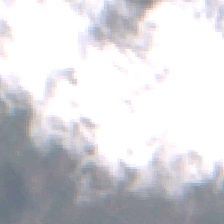

In [8]:
from PIL import Image, ImageDraw

image = Image.open(path_img+'/'+os.listdir(path_img)[0])
image

In [ ]:

print("Размер изображения:")
print(image.format, image.size, image.mode)

Размер изображения:
JPEG (448, 448) RGB


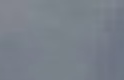

In [ ]:
#обрезка (x1, y1, x2, y2)
cropped = image.crop((100, 0, 224, 80))
cropped

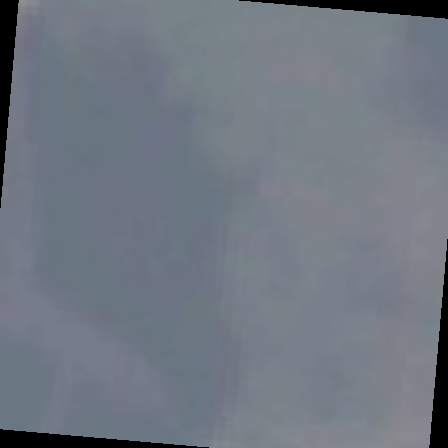

In [ ]:
#поворот
rotated = image.rotate(-185)
rotated

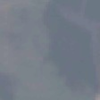

In [ ]:
#изменить размер
resized = image.resize((100, 100))
resized

In [ ]:
print(resized.format, resized.size, resized.mode)

None (100, 100) RGB


Про RGB - https://otus.ru/journal/rgb-opisanie-ispolzovanie-osobennosti/

## Keras

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

In [5]:
arr_img=[]
for i in os.listdir(path_img):
  p = path_img+'/'+i
  img = load_img(p)
  arr_img.append(img_to_array(img))
len(arr_img)

45

In [6]:
arr_img[0].shape

(224, 224, 3)

In [9]:
arr_img[0][0].shape

(224, 3)

In [12]:
arr_img[0][0]

array([[249., 247., 252.],
       [250., 248., 253.],
       [246., 245., 251.],
       [240., 239., 245.],
       [235., 234., 242.],
       [234., 231., 240.],
       [240., 232., 245.],
       [248., 236., 250.],
       [249., 233., 246.],
       [248., 230., 242.],
       [251., 231., 242.],
       [250., 233., 239.],
       [247., 231., 234.],
       [248., 237., 235.],
       [255., 245., 243.],
       [249., 244., 240.],
       [255., 254., 252.],
       [254., 254., 254.],
       [254., 254., 254.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 253.],
       [254., 254., 252.],
       [255., 255., 253.],
       [254., 252., 253.],
       [255., 253., 255.],
       [250., 243., 251.],
 

## Вычисляем облачность

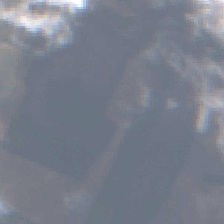

In [ ]:
image = Image.open(path_img+'/'+os.listdir(path_img)[5])
image

In [ ]:
dr = ImageDraw.Draw(image)
#dr.point((50,50), fill="white")

In [ ]:
cloud_pixel_count = 0
print(arr_img[5].shape)
for index,i in enumerate(arr_img[5]):
  for index_p,item in enumerate(i):
    if item[0]>=180 and item[1]>=180 and item[-1]>=180:
      dr.point((index_p,index), fill="yellow")
      cloud_pixel_count+=1


cloud_pixel_count

(224, 224, 3)


50176

In [ ]:
print(602/(224*224))

0.011997767857142858
